In [ ]:
#Reading and understanding data: 
    #Importing Libraries
    #Reading Data
    #Describing Data
    #Data Info

#Exploratory Data Analysis
    #Clearing Data(Missing value)
    #Univariate Analysis
    #Bivariate Analysis
    #Multivariate Analysis

#Outlier Treatment

#Scaling Data

#Clustering using kmeans
    #Coba cluster tiap tiap column

#Summary

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('Data_Negara_HELP.csv')

df = df.set_index('Negara')

df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kematian_anak     167 non-null    float64
 1   Ekspor            167 non-null    float64
 2   Kesehatan         167 non-null    float64
 3   Impor             167 non-null    float64
 4   Pendapatan        167 non-null    int64  
 5   Inflasi           167 non-null    float64
 6   Harapan_hidup     167 non-null    float64
 7   Jumlah_fertiliti  167 non-null    float64
 8   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [8]:
df[['Pendapatan','GDPperkapita']].astype(float)
df.fillna(method='ffill', inplace=True)
df_mean = df.mean()
df_mean

Kematian_anak          38.270060
Ekspor                 41.108976
Kesehatan               6.815689
Impor                  46.890215
Pendapatan          17144.688623
Inflasi                 7.781832
Harapan_hidup          70.555689
Jumlah_fertiliti        2.947964
GDPperkapita        12964.155689
dtype: float64

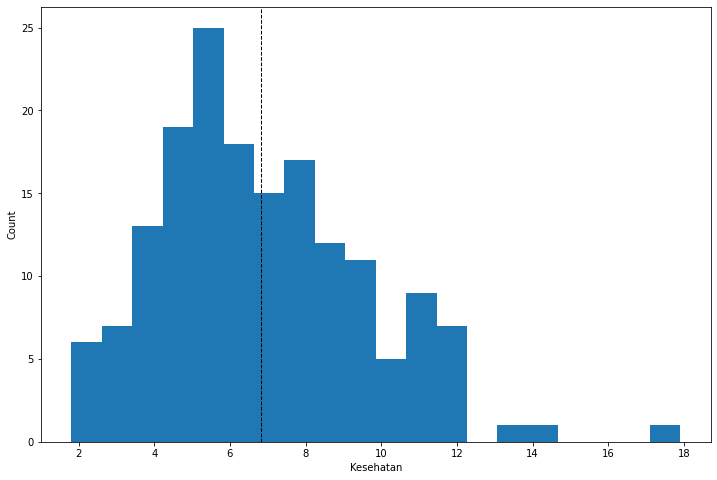

In [106]:
plt.figure(figsize=(12,8))
plt.hist(df['Kesehatan'], bins=20)
plt.axvline(df['Kesehatan'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Kesehatan')
plt.ylabel('Count')
plt.show()

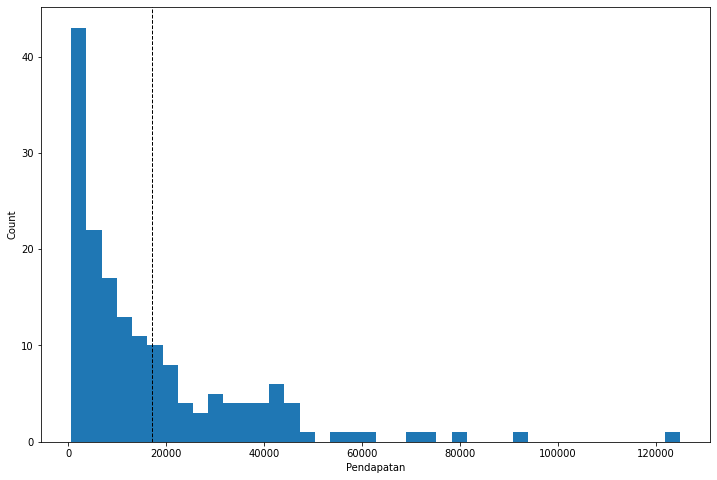

In [107]:
plt.figure(figsize=(12,8))
plt.hist(df['Pendapatan'], bins=40)
plt.axvline(df['Pendapatan'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.show()

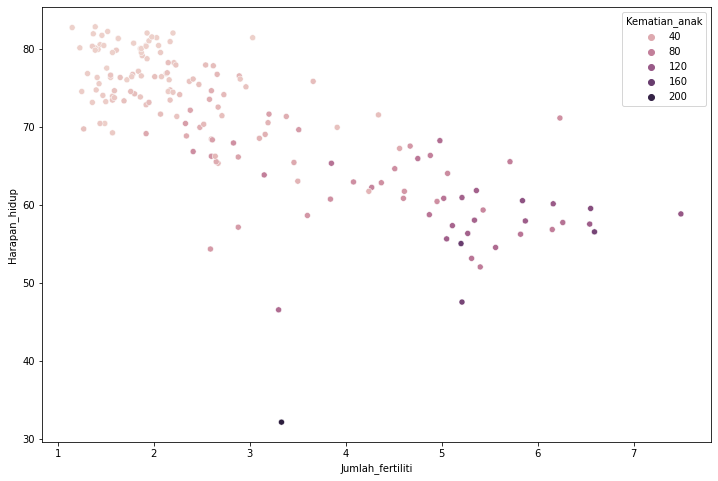

In [108]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Jumlah_fertiliti', y='Harapan_hidup', data=df, hue='Kematian_anak')
plt.show()

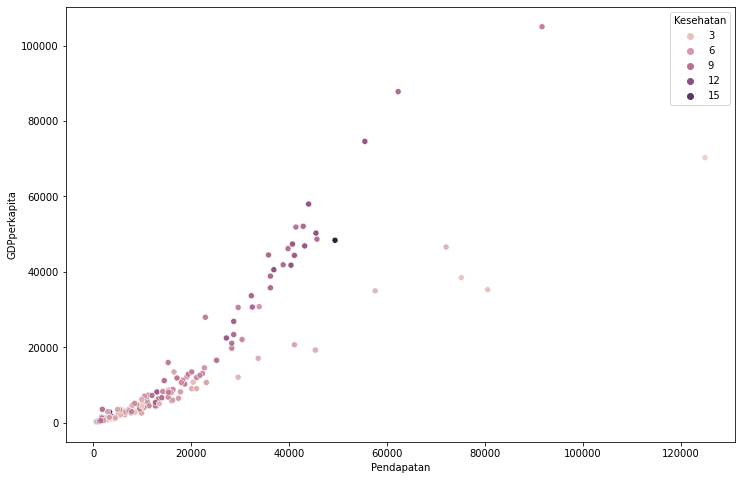

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Pendapatan', y='GDPperkapita', data=df, hue='Kesehatan')
plt.show()

C:\Users\BEN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pendapatan'>

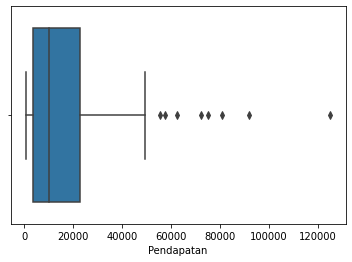

In [20]:
sns.boxplot('Pendapatan', data=df)

C:\Users\BEN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kesehatan'>

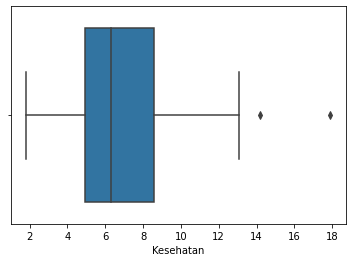

In [6]:
sns.boxplot('Kesehatan', data=df)

C:\Users\BEN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDPperkapita'>

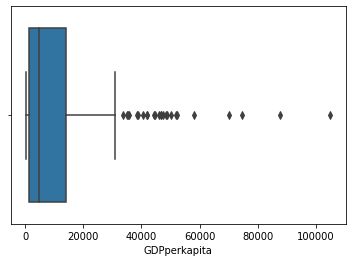

In [7]:
sns.boxplot('GDPperkapita', data=df)

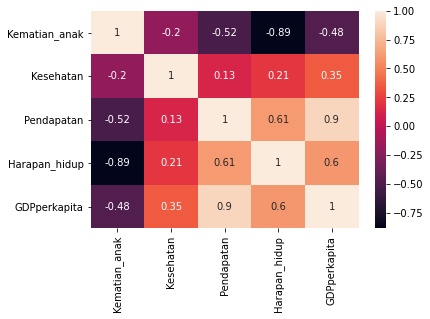

In [25]:
sns.heatmap(df[['Kematian_anak', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'GDPperkapita']].corr(), annot =True, fmt='.2g')

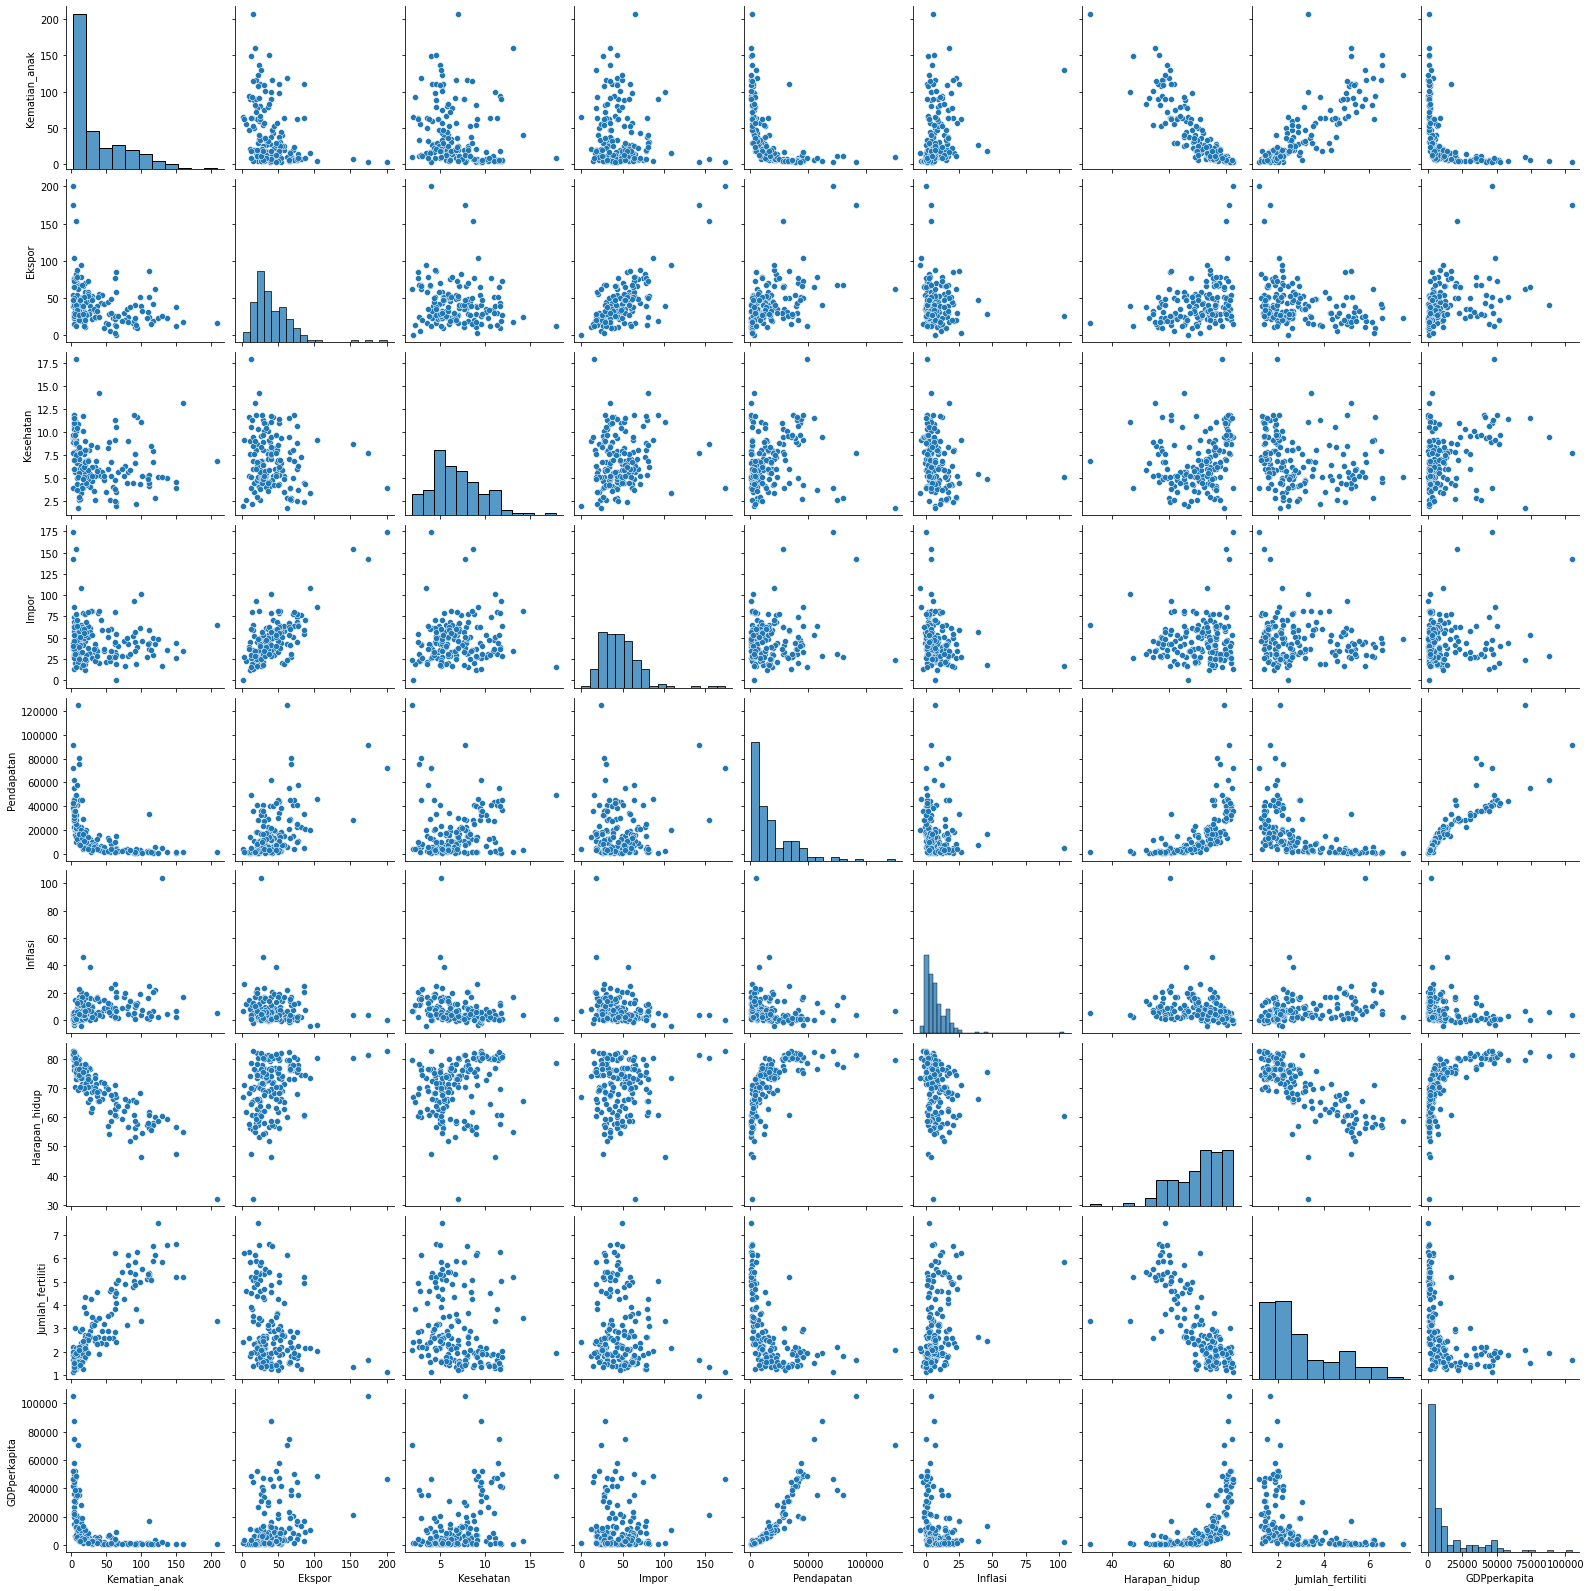

In [23]:
sns.pairplot(df, diag_kind='hist')

In [9]:
def finding_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    df_final = df[(df<(q1-(1.5*IQR))) | (df>(q3+(1.5*IQR)))]
    return df_final

def remove_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    df_final = df[~((df<(q1-(1.5*IQR))) | (df>(q3+(1.5*IQR))))]
    return df_final

In [10]:
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['GDPperkapita']))

Negara
Micronesia, Fed. Sts.    14.2
United States            17.9
Name: Kesehatan, dtype: float64
Negara
Brunei                   80600
Kuwait                   75200
Luxembourg               91700
Norway                   62300
Qatar                   125000
Singapore                72100
Switzerland              55500
United Arab Emirates     57600
Name: Pendapatan, dtype: int64
Negara
Australia                51900
Austria                  46900
Belgium                  44400
Brunei                   35300
Canada                   47400
Denmark                  58000
Finland                  46200
France                   40600
Germany                  41800
Iceland                  41900
Ireland                  48700
Italy                    35800
Japan                    44500
Kuwait                   38500
Luxembourg              105000
Netherlands              50300
New Zealand              33700
Norway                   87800
Qatar                    70300
Singapore          

In [71]:
df_new = remove_outlier(df[['Pendapatan', 'GDPperkapita']])
df_new.dropna(axis=0, inplace=True)
df_new

,Pendapatan,GDPperkapita
Negara,,
Afghanistan,1610.0,553.0
Albania,9930.0,4090.0
Algeria,12900.0,4460.0
Angola,5900.0,3530.0
Antigua and Barbuda,19100.0,12200.0
...,...,...
Vanuatu,2950.0,2970.0
Venezuela,16500.0,13500.0
Vietnam,4490.0,1310.0


C:\Users\BEN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pendapatan'>

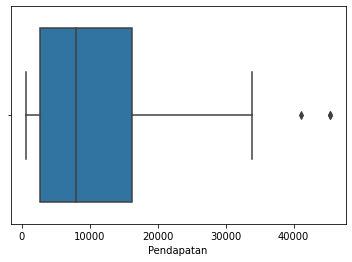

In [72]:
sns.boxplot('Pendapatan', data=df_new)

In [73]:
sc = StandardScaler()
df_std = sc.fit_transform(df_new.astype(float))

In [74]:
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [75]:
new_df = pd.DataFrame(data=df_std)
new_df['label1_kmeans'] = labels1
new_df

,0,1,label1_kmeans
0,-0.945783,-0.816938,0
1,-0.101991,-0.317709,0
2,0.199219,-0.265485,0
3,-0.510703,-0.396750,0
4,0.828006,0.826975,1
...,...,...,...
137,-0.809884,-0.475791,0
138,0.564321,1.010463,1
139,-0.653701,-0.710091,0
140,-0.654715,-0.710091,0


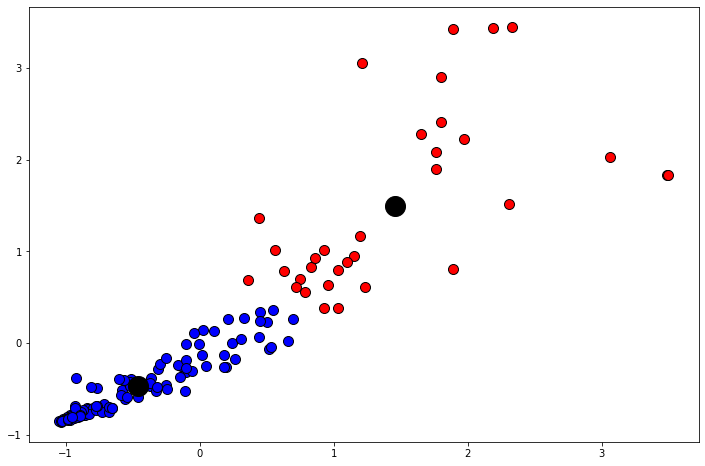

In [76]:
plt.figure(figsize=(12,8))

plt.scatter(new_df[0][new_df.label1_kmeans == 0], new_df[1][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='black')
plt.scatter(new_df[0][new_df.label1_kmeans == 1], new_df[1][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='black')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=400 )

plt.show()

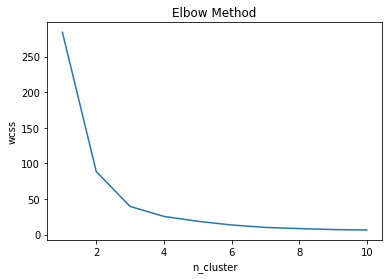

In [77]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

In [78]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0])

In [79]:
new_df['label2_kmeans'] = labels2
new_df

,0,1,label1_kmeans,label2_kmeans
0,-0.945783,-0.816938,0,0
1,-0.101991,-0.317709,0,0
2,0.199219,-0.265485,0,2
3,-0.510703,-0.396750,0,0
4,0.828006,0.826975,1,2
...,...,...,...,...
137,-0.809884,-0.475791,0,0
138,0.564321,1.010463,1,2
139,-0.653701,-0.710091,0,0
140,-0.654715,-0.710091,0,0


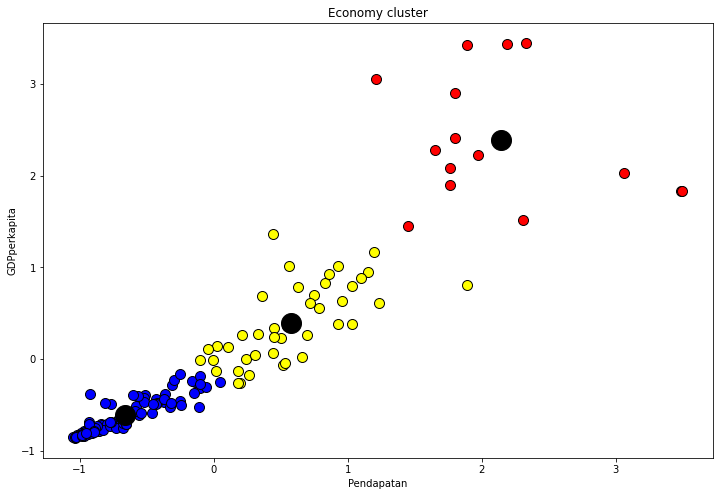

In [80]:
plt.figure(figsize=(12,8))

plt.scatter(new_df[0][new_df.label2_kmeans == 0], new_df[1][new_df.label2_kmeans == 0], c='blue', s=100, edgecolor='black')
plt.scatter(new_df[0][new_df.label2_kmeans == 1], new_df[1][new_df.label2_kmeans == 1], c='red', s=100, edgecolor='black')
plt.scatter(new_df[0][new_df.label2_kmeans == 2], new_df[1][new_df.label2_kmeans == 2], c='yellow', s=100, edgecolor='black')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=400 )
plt.title('Economy cluster')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

In [81]:
df3 = remove_outlier(df[['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti']])

df3.dropna(axis=0, inplace=True)
df3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti
Negara,,,
Afghanistan,90.2,56.2,5.82
Albania,16.6,76.3,1.65
Algeria,27.3,76.5,2.89
Angola,119.0,60.1,6.16
Antigua and Barbuda,10.3,76.8,2.13
...,...,...,...
Vanuatu,29.2,63.0,3.50
Venezuela,17.1,75.4,2.47
Vietnam,23.3,73.1,1.95


In [85]:
sc = StandardScaler()
df_std2 = sc.fit_transform(df3.astype(float))

In [93]:
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std2)
labels3 = kmeans3.labels_

In [94]:
new_df2 = pd.DataFrame(data=df_std2, columns=['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti'])
new_df2['label3_kmeans'] = labels3

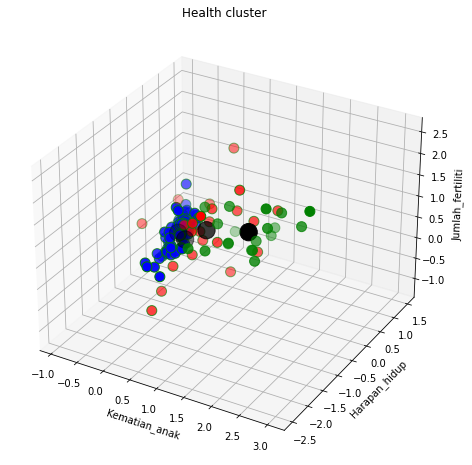

In [105]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df2['Kematian_anak'][new_df2.label3_kmeans == 0], new_df2['Harapan_hidup'][new_df2.label3_kmeans == 0], new_df2['Jumlah_fertiliti'][new_df2.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
ax.scatter(new_df2['Kematian_anak'][new_df2.label3_kmeans == 1], new_df2['Harapan_hidup'][new_df2.label3_kmeans == 1], new_df2['Jumlah_fertiliti'][new_df2.label3_kmeans == 1], c='red', s=100, edgecolor='green')
ax.scatter(new_df2['Kematian_anak'][new_df2.label3_kmeans == 2], new_df2['Harapan_hidup'][new_df2.label3_kmeans == 2], new_df2['Jumlah_fertiliti'][new_df2.label3_kmeans == 2], c='green', s=100, edgecolor='green')


ax.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1],kmeans3.cluster_centers_[:, 2], c='k', s=300 )
plt.title('Health cluster')
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
ax.set_zlabel('Jumlah_fertiliti')
plt.show()